# MNIST Handwritten digits classification

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In [35]:
import pandas as pd
import numpy as np

In [36]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from joblib import dump, load

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [99]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.models import load_model
from keras.layers import Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Смотрим на данные

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

In [40]:
df_train = pd.read_csv('./data/train.csv')

In [41]:
df_train.shape

(42000, 785)

In [42]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_train.label.value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

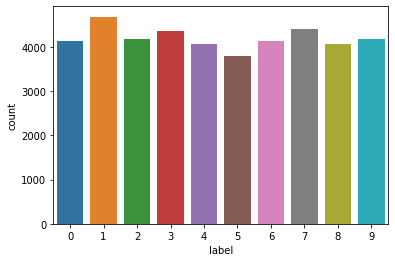

In [44]:
sns.countplot(df_train['label']);

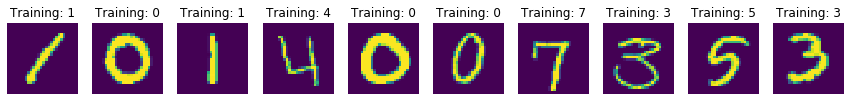

In [45]:
plt.figure(figsize=(15,10))
for i in range(0, 10):
    plt.subplot(1, 10, i+1)
    im_data = df_train.iloc[i, 1:].values.reshape((28,28))
    im_label = df_train.iloc[i, 0]
    plt.imshow(im_data,interpolation='nearest');
    plt.axis('off')
    plt.title('Training: %i' % im_label)

### Предобрабатываем данные

In [46]:
# преобразуем немного типы
df_train_x = (df_train.iloc[:,1:].values).astype('float32')
df_train_y = df_train.iloc[:,0].values.astype('int32')

In [47]:
# нормируем данные
df_train_x = df_train_x / 255.0

In [48]:
# делим данные на тест и трейн
x_train, x_test, y_train, y_test = train_test_split(
    df_train_x, df_train_y, test_size=0.2, shuffle=False
)

In [49]:
x_train.shape, x_test.shape

((33600, 784), (8400, 784))

### Строим модель

**k-NN (k-nearest neighbors algorithm)**

<div>
<img src="./other/knn.png" width="400"/>
</div>

In [50]:
knn_model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [51]:
%%time
knn_model.fit(x_train[:8000], y_train[:8000])

CPU times: user 632 ms, sys: 0 ns, total: 632 ms
Wall time: 630 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [52]:
knn_model.score(x_test, y_test)

0.9475

In [53]:
y_pred = knn_model.predict(x_test)

In [54]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       852
           1       0.91      1.00      0.95       950
           2       0.97      0.92      0.94       801
           3       0.95      0.94      0.95       882
           4       0.94      0.94      0.94       811
           5       0.94      0.94      0.94       747
           6       0.98      0.98      0.98       831
           7       0.95      0.95      0.95       884
           8       0.98      0.88      0.93       802
           9       0.92      0.91      0.92       840

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



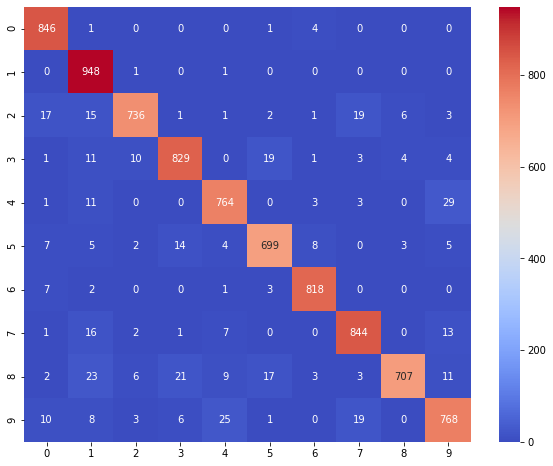

In [55]:
matrix = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm');

**SVM (support vector machine)**

<div>
<img src="./other/svm.png" width="400"/>
</div>

In [56]:
# Create a classifier: a support vector classifier
svm_model = svm.SVC(gamma=0.001, random_state=777)

In [57]:
%%time
svm_model.fit(x_train[:8000], y_train[:8000])

CPU times: user 25.4 s, sys: 0 ns, total: 25.4 s
Wall time: 25.4 s


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=777, shrinking=True, tol=0.001,
    verbose=False)

In [58]:
svm_model.score(x_test, y_test)

0.915

In [59]:
y_pred = svm_model.predict(x_test)

In [60]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       852
           1       0.91      0.99      0.95       950
           2       0.93      0.89      0.91       801
           3       0.93      0.87      0.90       882
           4       0.91      0.91      0.91       811
           5       0.88      0.88      0.88       747
           6       0.93      0.96      0.95       831
           7       0.94      0.92      0.93       884
           8       0.90      0.86      0.88       802
           9       0.87      0.88      0.88       840

    accuracy                           0.92      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.92      0.92      0.91      8400



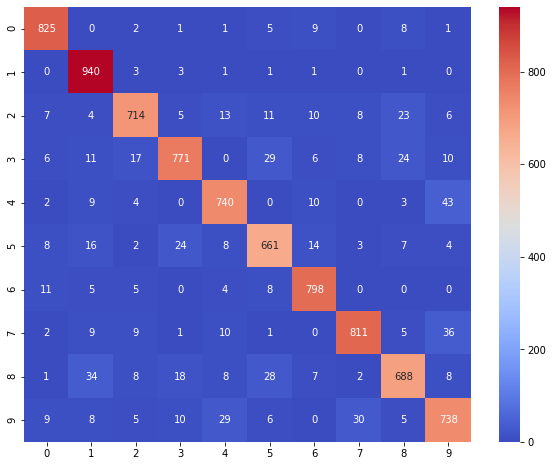

In [61]:
matrix = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm');

**MLP (multi-layer perceptron)**

<div>
<img src="./other/mlp.png" width="400"/>
</div>

In [62]:
# convert list of labels to binary class matrix
y_train_c = np_utils.to_categorical(y_train) 
y_test_c = np_utils.to_categorical(y_test)

In [63]:
input_dim = x_train.shape[1]
nb_classes = y_train_c.shape[1]

In [64]:
# Here's a Deep Dumb MLP (DDMLP)
mlp_model = Sequential()
mlp_model.add(Dense(128, input_dim=input_dim))
mlp_model.add(Activation('relu'))
mlp_model.add(Dropout(0.15))
mlp_model.add(Dense(128))
mlp_model.add(Activation('relu'))
mlp_model.add(Dropout(0.15))
mlp_model.add(Dense(nb_classes))
mlp_model.add(Activation('softmax'))

In [65]:
# we'll use categorical xent for the loss, and RMSprop as the optimizer
mlp_model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [66]:
mlp_model.fit(x_train, y_train_c, nb_epoch=10, batch_size=16, validation_split=0.1, verbose=2)

/home/kiramipt/PycharmProjects/mnist/venv/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 30240 samples, validate on 3360 samples
Epoch 1/10
 - 6s - loss: 0.3474 - val_loss: 0.1568
Epoch 2/10
 - 5s - loss: 0.1794 - val_loss: 0.1225
Epoch 3/10
 - 5s - loss: 0.1433 - val_loss: 0.1250
Epoch 4/10
 - 5s - loss: 0.1370 - val_loss: 0.1240
Epoch 5/10
 - 5s - loss: 0.1218 - val_loss: 0.1339
Epoch 6/10
 - 5s - loss: 0.1190 - val_loss: 0.1523
Epoch 7/10
 - 5s - loss: 0.1168 - val_loss: 0.1478
Epoch 8/10
 - 5s - loss: 0.1152 - val_loss: 0.1573
Epoch 9/10
 - 5s - loss: 0.1084 - val_loss: 0.1711
Epoch 10/10
 - 5s - loss: 0.1149 - val_loss: 0.1765


In [67]:
y_pred = mlp_model.predict_classes(x_test, verbose=0)

In [68]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       852
           1       0.98      0.99      0.98       950
           2       0.98      0.96      0.97       801
           3       0.94      0.97      0.96       882
           4       0.96      0.98      0.97       811
           5       0.98      0.93      0.95       747
           6       0.98      0.98      0.98       831
           7       0.97      0.99      0.98       884
           8       0.98      0.95      0.96       802
           9       0.97      0.95      0.96       840

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



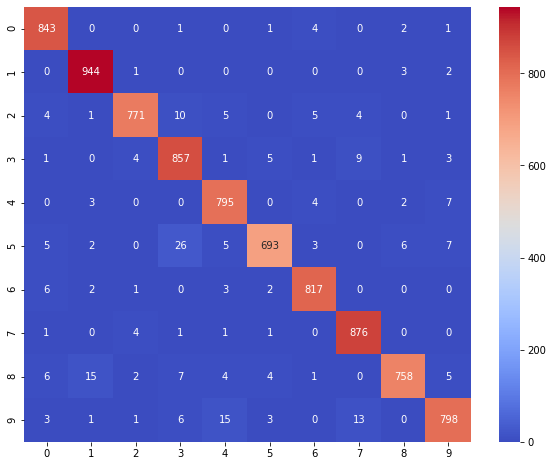

In [69]:
matrix = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm');

**Conv2D**

In [87]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [88]:
x_train_c = x_train.reshape(-1,28,28,1)

In [104]:
conv2d_model = Sequential()

conv2d_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
conv2d_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
conv2d_model.add(MaxPool2D(pool_size=(2,2)))
conv2d_model.add(Dropout(0.25))


conv2d_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
conv2d_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
conv2d_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
conv2d_model.add(Dropout(0.25))


conv2d_model.add(Flatten())
conv2d_model.add(Dense(256, activation = "relu"))
conv2d_model.add(Dropout(0.5))
conv2d_model.add(Dense(10, activation = "softmax"))

In [105]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [106]:
# Compile the model
conv2d_model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [107]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [108]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [109]:
x_train_c.shape

(33600, 28, 28, 1)

In [110]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

In [111]:
datagen.fit(x_train_c)

In [112]:
# Fit the model
_ = conv2d_model.fit_generator(datagen.flow(x_train_c, y_train_c, batch_size=batch_size),
                              epochs = epochs,
                              verbose = 2, steps_per_epoch=x_train_c.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/1
 - 67s - loss: 0.4373 - acc: 0.8581


In [113]:
y_pred = conv2d_model.predict_classes(x_test.reshape(-1,28,28,1))

In [114]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       852
           1       0.99      0.98      0.98       950
           2       0.95      0.99      0.97       801
           3       1.00      0.94      0.97       882
           4       0.99      0.98      0.99       811
           5       0.95      0.99      0.97       747
           6       0.93      1.00      0.96       831
           7       0.98      0.97      0.97       884
           8       0.97      0.95      0.96       802
           9       0.98      0.95      0.96       840

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



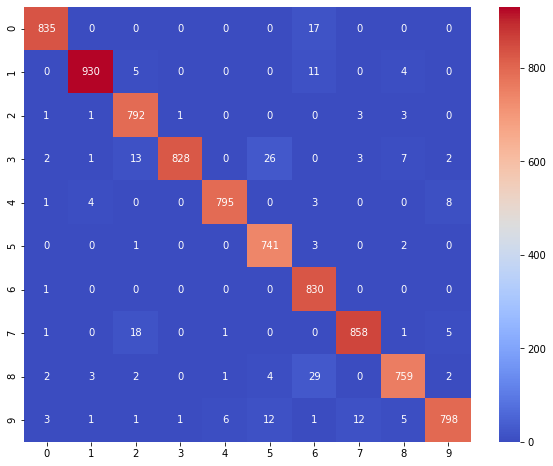

In [115]:
matrix = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm');

### Смотрим что получилось

У нас есть 3 модели:
* knn (0.95)
* svm (0.92)
* mlp (0.97)
* conv_2d (0.98)

In [117]:
# сохраняем модели
dump(knn_model, './models/knn_model.joblib');
dump(svm_model, './models/svm_model.joblib');
mlp_model.save("./models/mlp_model.h5");
conv2d_model.save("./models/conv2d_model.h5");

In [118]:
# восстанавливаем модели из дампа
knn_model_restored = load('./models/knn_model.joblib') 
svm_model_restored = load('./models/svm_model.joblib') 
mlp_model_restored = load_model("./models/mlp_model.h5")
conv2d_model_restored = load_model("./models/conv2d_model.h5")

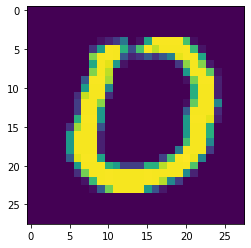

In [119]:
image_data = x_test[0, ].reshape(1, -1)
plt.imshow(image_data.reshape((28,28)), interpolation='nearest');

In [120]:
image_data.shape

(1, 784)

In [122]:
knn_pred = knn_model_restored.predict(image_data)[0]
svm_pred = svm_model_restored.predict(image_data)[0]
mlp_pred = mlp_model_restored.predict_classes(image_data)[0]
conv2d_pred = conv2d_model_restored.predict_classes(image_data.reshape(-1,28,28,1))[0]

In [123]:
print(f'y_true = {y_test[0]} | out predictions: knn={knn_pred}, svm={svm_pred}, mlp={mlp_pred}, conv2d_pred={conv2d_pred}')

y_true = 0 | out predictions: knn=0, svm=0, mlp=0, conv2d_pred=0


### Задеплоим наши модельки [link](https://www.pytorials.com/deploy-keras-model-to-production-using-flask/)